In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
import numpy as np

import utils.windFarms as wfman
from utils.networks import GraphNeuralNet as GNN
from utils.graphNetHelpers import graph2inputs
from utils.testUtils import test_speed_direction, draw_heat_map, test_pib_dib, test_pib_dib_colunm_wind_direction


import torch

## Initialize windfarm

In [3]:
wind_farm_man = wfman.RandomSampleManager.load('../attention_farm.json')

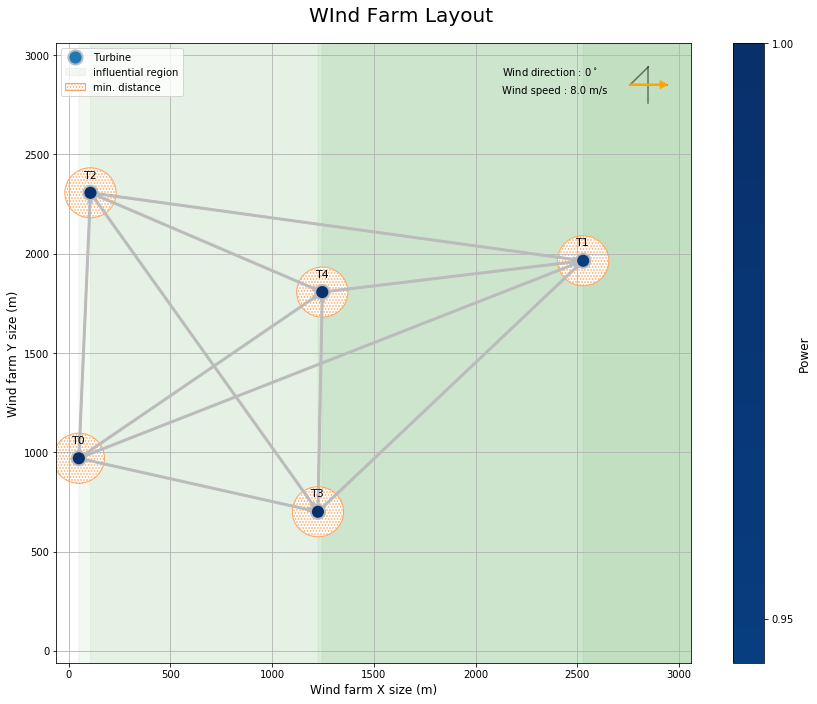

In [4]:
#wind_farm_man.sample_wind_farm(5)
wind_farm_man.update_wind_farm_graph(wind_speed=8.0, wind_direction=0)
wind_farm_man.visualize_wind_farm()

## Load trained models

In [5]:
pib_path = '../pib_saves/pib8'
dib_path = '../dib_saves/dib3' # Best performer

pib = GNN.load(pib_path, device='cpu')
pib.eval()

dib = GNN.load(dib_path, device='cpu')
dib.eval()

GraphNeuralNet(
  (layers): ModuleList(
    (0): GraphNetworkBlock(
      (encoders): ModuleList(
        (0): MultiLayerPerceptron(
          (layers): ModuleList(
            (0): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (1): Linear(in_features=8, out_features=256, bias=True)
            (2): Linear(in_features=256, out_features=256, bias=True)
            (3): Linear(in_features=256, out_features=128, bias=True)
            (4): Linear(in_features=128, out_features=50, bias=True)
          )
        )
        (1): MultiLayerPerceptron(
          (layers): ModuleList(
            (0): BatchNorm1d(54, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (1): Linear(in_features=54, out_features=256, bias=True)
            (2): Linear(in_features=256, out_features=256, bias=True)
            (3): Linear(in_features=256, out_features=128, bias=True)
            (4): Linear(in_features=128, out_features=50, bias=True

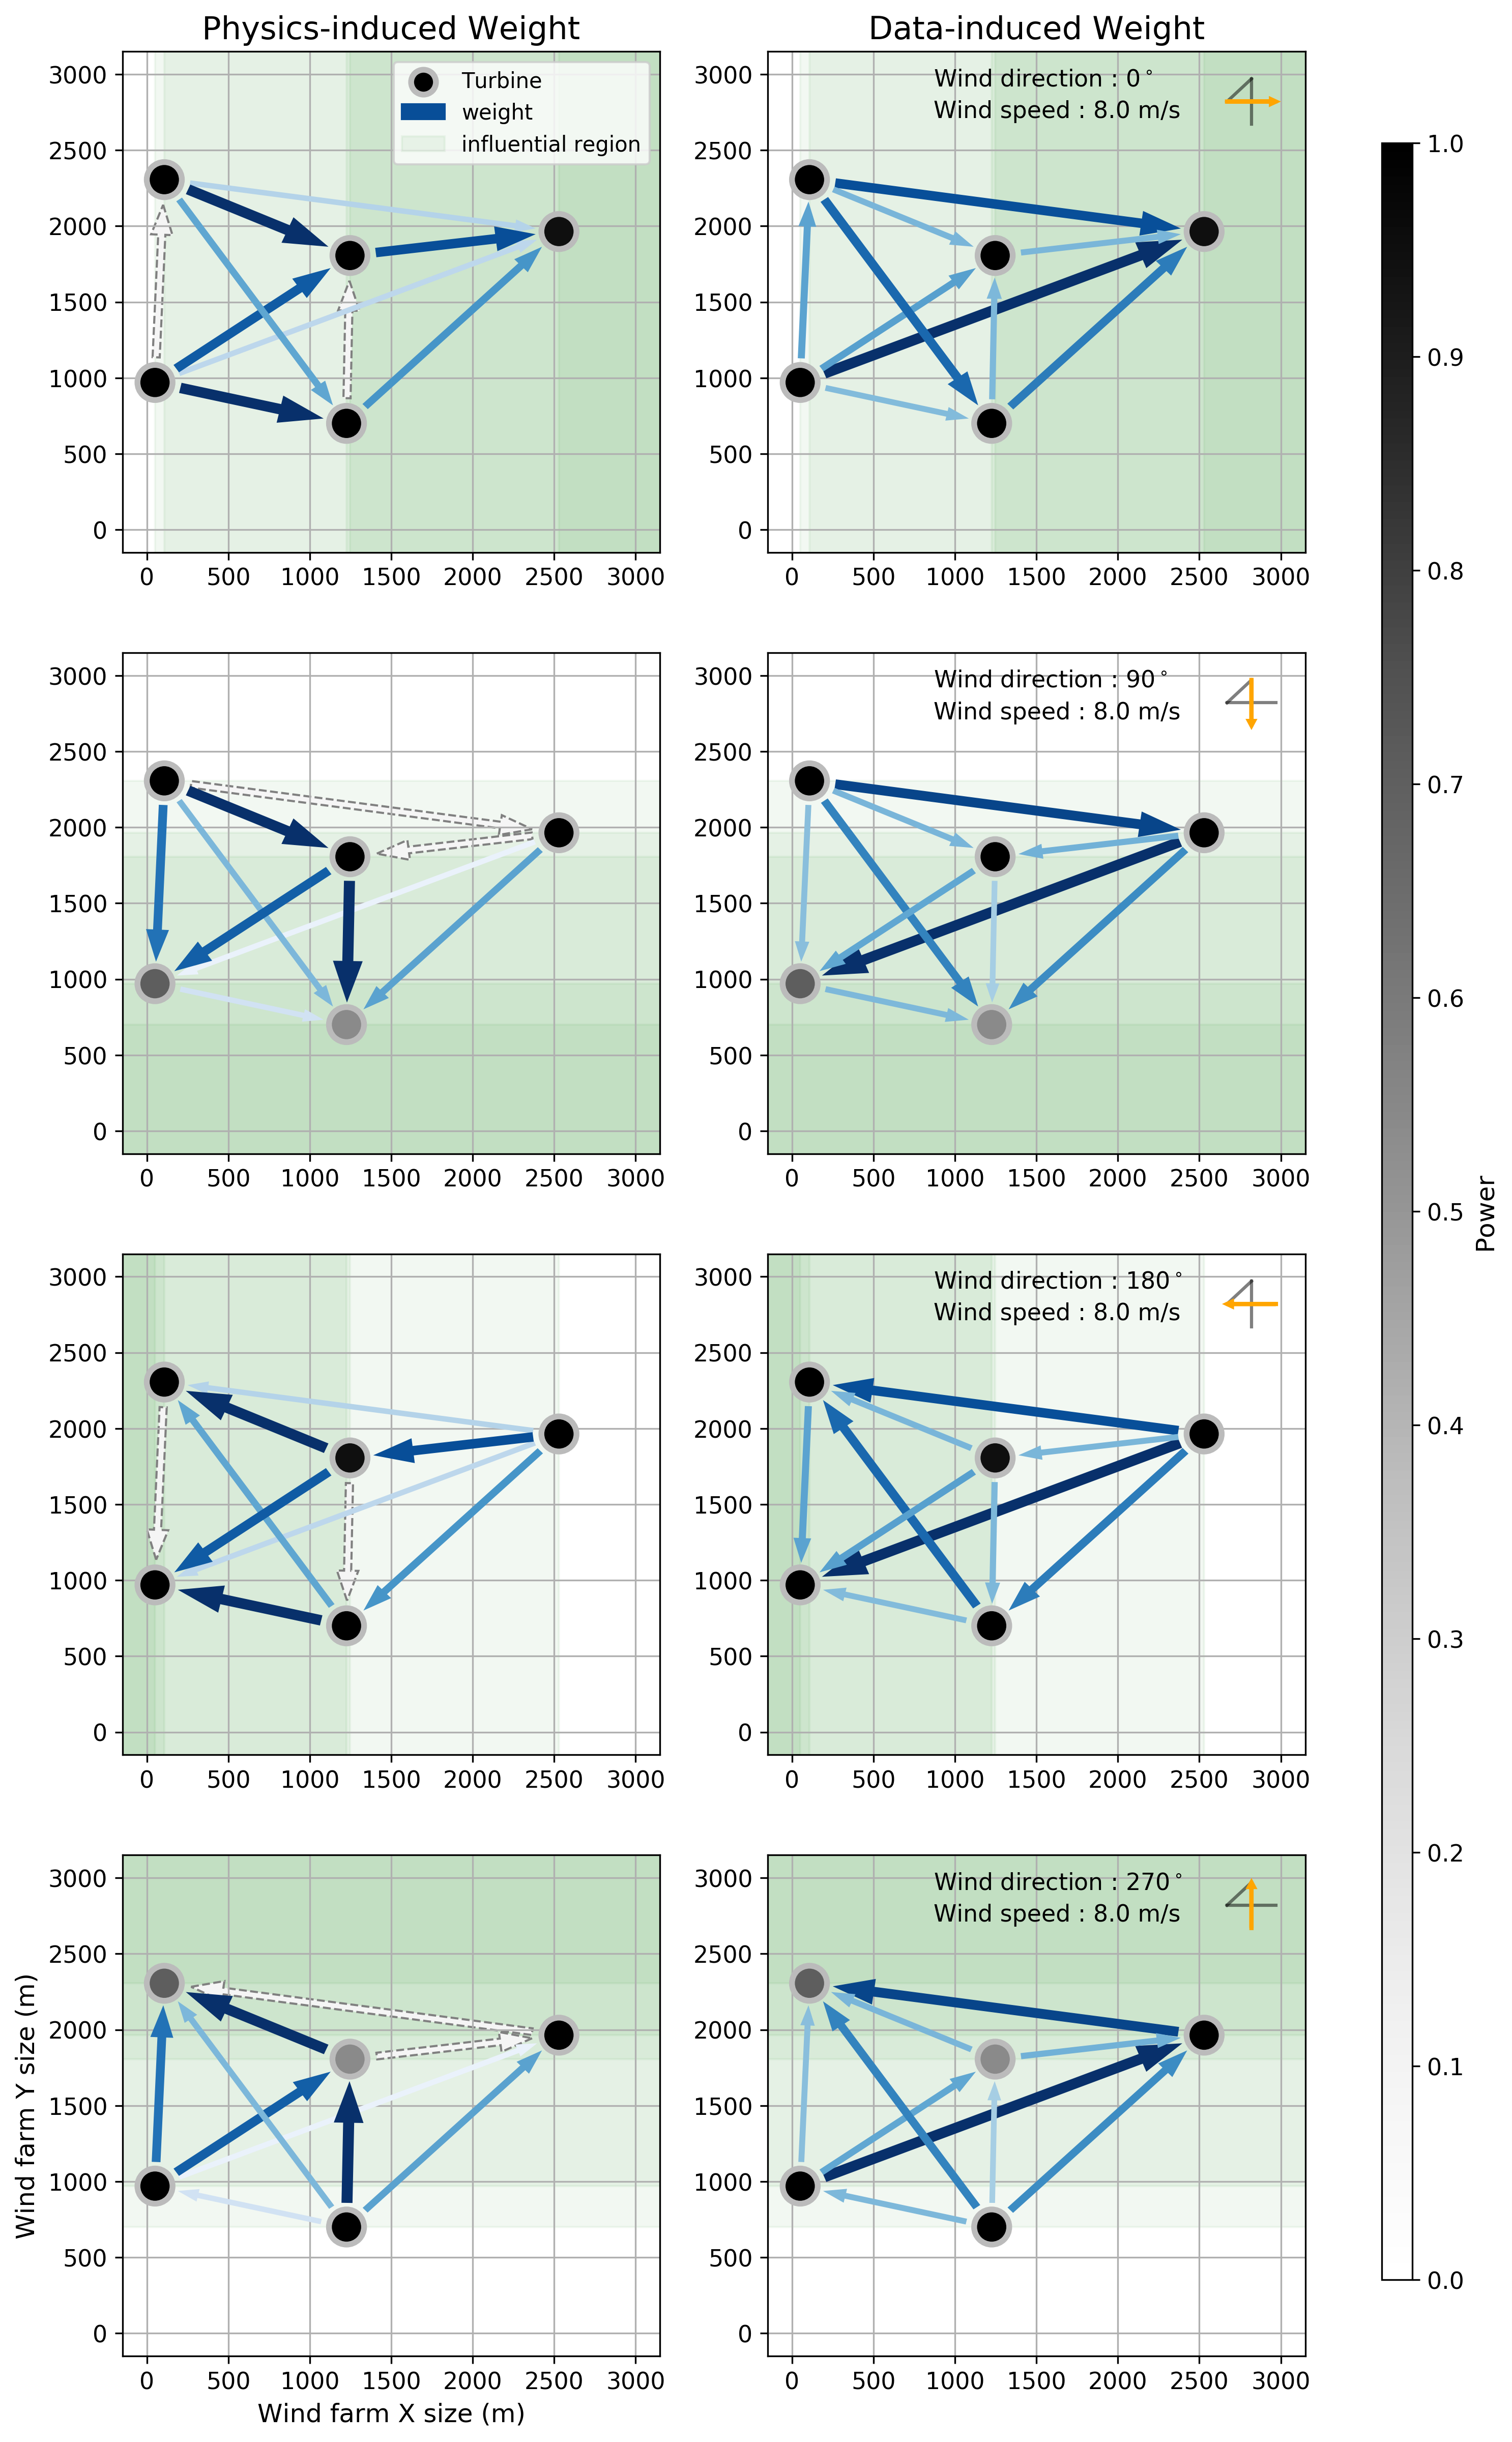

In [6]:
fig = test_pib_dib(pib, dib, wind_farm_man, 
                   wind_directions=[0,90,180,270],
                   wind_speed=8.0,
                   title_size=15.0,
                   tick_size=11.0,
                   label_size=12.0,
                   annote_attention=False,
                   annote_turbine=False,
                   annote_power=False,
                   show_influential_region=True)

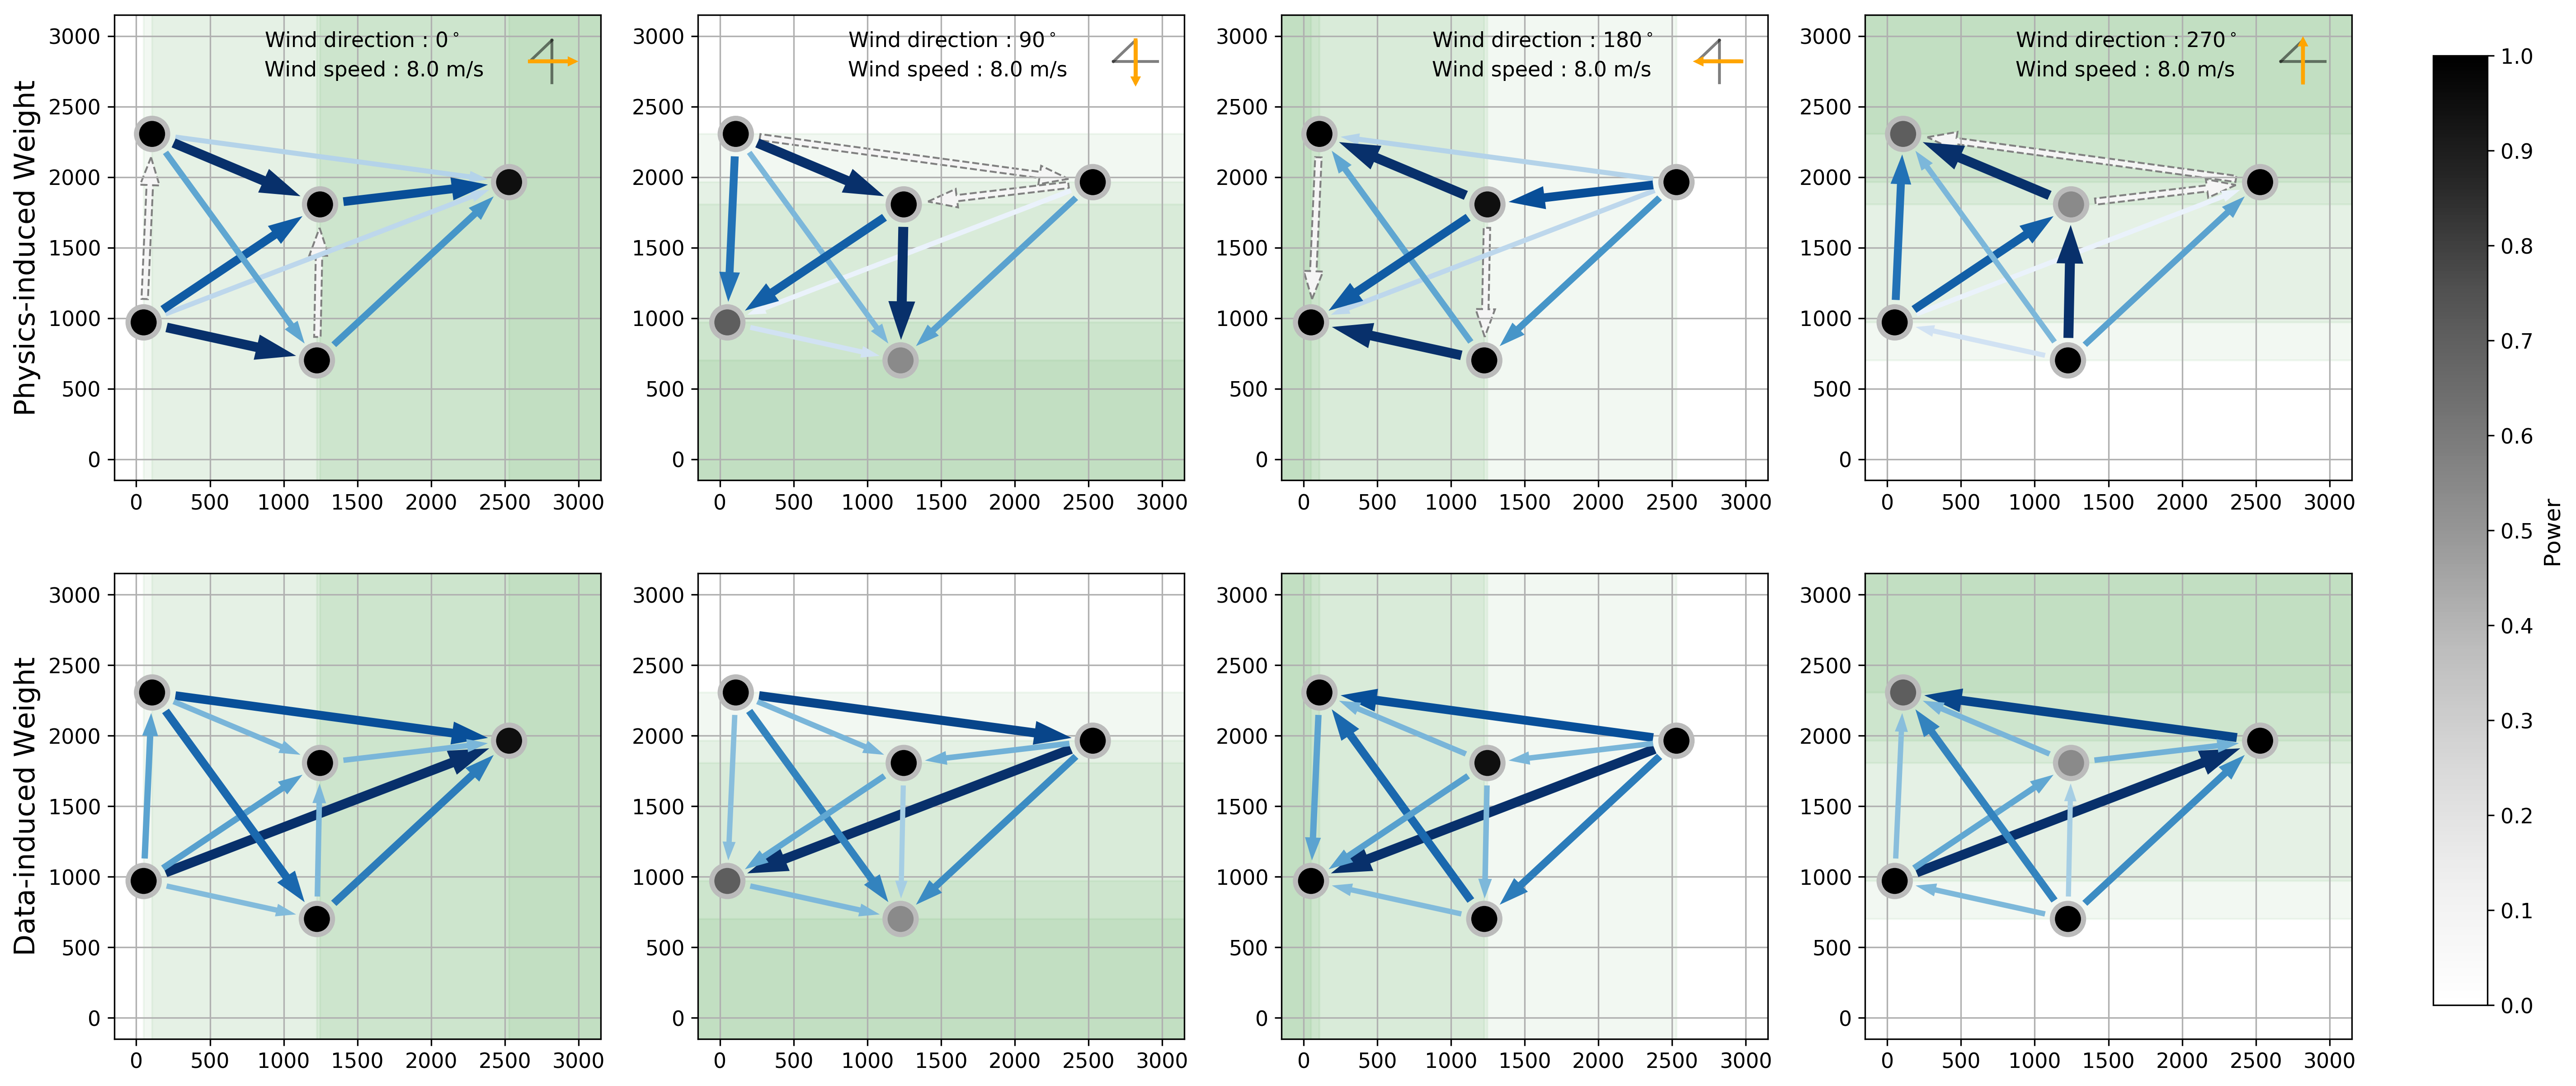

In [7]:
fig = test_pib_dib_colunm_wind_direction(pib, dib, wind_farm_man, 
                                         wind_directions=[0,90,180,270],
                                         wind_speed=8.0,
                                         title_size=15.0,
                                         tick_size=11.0,
                                         label_size=12.0,
                                         annote_x_label=False,
                                         annote_attention=False,
                                         annote_turbine=False,
                                         annote_power=False,
                                         show_influential_region=True)